<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson3/hometask/SyntheticRubber.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# !pip install yfinance

In [131]:
import yfinance as yf
import pandas as pd
import requests

In [184]:
crude_oil_ticker = "CL=F"
exr_eurusd_ticker = "EURUSD=X"
crude_oil = yf.download(crude_oil_ticker)
exr = yf.download(exr_eurusd_ticker)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Синтетический каучук" (СК), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на СК. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


* СК производиться из нефти. Один из известных способов производства предполагает, что из 10 баррелей нефти сделают одну тонну СК, а затраты на производство в районе 400 евро.

In [185]:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Сonty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Ant':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'99': 0.01, # до 100 тонн 1%
             '299': 0.05, #  до 300 тонн 5%
             '300': 0.1}   # больше 300 тонн 10%


### Что нужно сделать?

1. Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных. 
* Важно, чтобы цена покрывала расходы на производство и при этом была в рынке, то есть на уровне натурального каучука или с небольшим дисконтом, котировки на который можно взять с сайта http://www3.lgm.gov.my/mre/MonthlyPrices.aspx (в центах за килограм). Можно перевести в доллары за тонну.
2. Отобразить на графике.
3. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
4. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 



In [186]:
data.Close.mean()

63.74706088871404

In [187]:
#Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных.
# базовая цена = средняя цена закрытия нефти * 10 баррелей нефти на одну тонну СК + затраты на производство
ck_price_base = 10 * PRODUCTION_COST + data.Close.mean()
ck_price_base

4063.7470608887143

In [188]:
# Важно, чтобы цена покрывала расходы на производство и при этом была в рынке, то есть на уровне натурального каучука 
#или с небольшим дисконтом, котировки на который можно взять с сайта http://www3.lgm.gov.my/mre/MonthlyPrices.aspx
df = pd.DataFrame()
for i in range(1, 16):
    if i < 13:
        year = '2022'
        url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={i}&year={year}"
        res = requests.get(url)
        rj = res.json()
        df = pd.concat([df, pd.json_normalize(rj)], axis=0)
    else:
        i -= 12
        year = '2023'
        url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={i}&year={year}"
        res = requests.get(url)
        rj = res.json()
        df = pd.concat([df, pd.json_normalize(rj)], axis=0)
df.tail()

,date,grade,masa,rm,us,tone
156,2023-03-01,SMR 5,Noon,635.50,143.90,Slightly steadier
157,2023-03-01,SMR GP,Noon,632.50,143.20,Slightly steadier
158,2023-03-01,SMR 10,Noon,625.50,141.60,Slightly steadier
159,2023-03-01,SMR 20,Noon,623.50,141.15,Slightly steadier
160,2023-03-01,Latex in Bulk,Noon,540.00,540.00,Slightly steadier


In [203]:
df.dtypes

date          object
grade         object
masa          object
rm            object
us           float64
tone          object
price_usd    float64
dtype: object

In [208]:
#(в центах за килограмм). Можно перевести в доллары за тонну.
df['us'] = df['us'].astype(float)
df['price_usd'] = df['us'] * 1000 / 100
df.tail()

,date,grade,masa,rm,us,tone,price_usd
156,2023-03-01,SMR 5,Noon,635.50,143.90,Slightly steadier,1439.0
157,2023-03-01,SMR GP,Noon,632.50,143.20,Slightly steadier,1432.0
158,2023-03-01,SMR 10,Noon,625.50,141.60,Slightly steadier,1416.0
159,2023-03-01,SMR 20,Noon,623.50,141.15,Slightly steadier,1411.5
160,2023-03-01,Latex in Bulk,Noon,540.00,540.00,Slightly steadier,5400.0


In [191]:
#опрееделяем среднюю цену для каждого grade - исхожу из предположения,что под grade понимается разный тип каучука
df.grade.unique()

array(['SMR CV', 'SMR L', 'SMR 5', 'SMR GP', 'SMR 10', 'SMR 20',
       'Latex in Bulk'], dtype=object)

In [209]:
da = df.groupby(by = 'grade').mean('price_usd')
da

,us,price_usd
grade,,
Latex in Bulk,558.256623,5582.566225
SMR 10,152.318212,1523.182119
SMR 20,151.858113,1518.581126
SMR 5,154.633113,1546.331126
SMR CV,220.601987,2206.019868
SMR GP,153.939073,1539.390728
SMR L,218.289901,2182.899007


In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

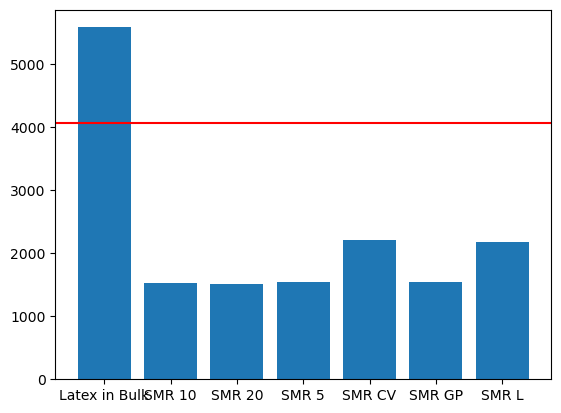

In [211]:
plt.bar(da.index, da.price_usd)
plt.axhline(y=ck_price_base, color='r', linestyle='-')
plt.show()

In [19]:
# в качестве ориентира базовой цены берем price_usd для "Latex in Bulk"

In [212]:
df.head()

,date,grade,masa,rm,us,tone,price_usd
0,2022-01-28,SMR CV,Noon,1002.50,242.70,Quiet,2427.0
1,2022-01-28,SMR L,Noon,992.50,240.25,Quiet,2402.5
2,2022-01-28,SMR 5,Noon,731.00,176.95,Quiet,1769.5
3,2022-01-28,SMR GP,Noon,728.00,176.25,Quiet,1762.5
4,2022-01-28,SMR 10,Noon,721.00,174.55,Quiet,1745.5


In [213]:
#Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой).
#Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
client_df2 = df[df.grade == 'Latex in Bulk']
client_df2['date'] = pd.to_datetime(client_df2.date, format='%Y-%m-%d')
client_df2.set_index("date", inplace = True)
client_df2.head()

C:\Users\liz_o\AppData\Local\Temp\ipykernel_45444\3206578178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df2['date'] = pd.to_datetime(client_df2.date, format='%Y-%m-%d')


,grade,masa,rm,us,tone,price_usd
date,,,,,,
2022-01-28,Latex in Bulk,Noon,589.50,589.5,Quiet,5895.0
2022-01-27,Latex in Bulk,Noon,590.00,590.0,Quiet,5900.0
2022-01-26,Latex in Bulk,Noon,589.00,589.0,Quiet,5890.0
2022-01-25,Latex in Bulk,Noon,585.50,585.5,Quiet,5855.0
2022-01-24,Latex in Bulk,Noon,582.50,582.5,Quiet,5825.0


In [ ]:
#расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой)
#ck_price = df_ck.price_usd.mean() + PRODUCTION_COST + EU_LOGISTIC_COST_EUR

In [147]:
customers.keys()

dict_keys(['Сonty', 'Triangle', 'Stone', 'Ant'])

In [148]:
customers.values()

dict_values([{'location': 'EU', 'volumes': 200, 'comment': 'moving_average'}, {'location': 'CN', 'volumes': 30, 'comment': 'monthly'}, {'location': 'EU', 'volumes': 150, 'comment': 'moving_average'}, {'location': 'EU', 'volumes': 70, 'comment': 'monthly'}])

In [197]:
def check_volume_discounts(x):
    if 0 < x <= 99:
        return 0.01
    elif 99 < x <= 299:
        return 0.05
    elif x >= 300:
        return 0.1
    else:
        return 0

In [198]:
clints = []
xlfilepath = 'wbp_prices.xlsx'
with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:
    for i , j in customers.items():
        for z, x in j.items():
            if z == 'location':
                base_price = df_ck.price_usd.mean() + PRODUCTION_COST + [EU_LOGISTIC_COST_EUR if z == 'EU' else CN_LOGISTIC_COST_USD]
            elif z == 'volumes':
                base_price *= check_volume_discounts(x)
            else:
                clints.append([{i: float(base_price)}])
    print(clints)

[[{'Сonty': 305.6283112582782}], [{'Triangle': 61.12566225165563}], [{'Stone': 305.6283112582782}], [{'Ant': 61.12566225165563}]]


In [214]:
client_df2.head()

,grade,masa,rm,us,tone,price_usd
date,,,,,,
2022-01-28,Latex in Bulk,Noon,589.50,589.5,Quiet,5895.0
2022-01-27,Latex in Bulk,Noon,590.00,590.0,Quiet,5900.0
2022-01-26,Latex in Bulk,Noon,589.00,589.0,Quiet,5890.0
2022-01-25,Latex in Bulk,Noon,585.50,585.5,Quiet,5855.0
2022-01-24,Latex in Bulk,Noon,582.50,582.5,Quiet,5825.0


In [215]:
crude_oil.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131


In [216]:
df2 = pd.concat([crude_oil.resample('M').mean()['Close'], client_df2.resample('M').mean()['price_usd']], axis=1)
df2.columns = ['crude_oil_price', 'eureusd']
df3 = df2['2022-01-01':'2022-12-31']
# # Formula (16*CrudeOil + 400 ) * Discount + Logistics
df3["proccessing_usd"] = df3['eureusd'] * 400
df3["base_wpb_price_usd"] = df3["crude_oil_price"]*16 + df3['proccessing_usd']


C:\Users\liz_o\AppData\Local\Temp\ipykernel_45444\247848054.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = pd.concat([crude_oil.resample('M').mean()['Close'], client_df2.resample('M').mean()['price_usd']], axis=1)
C:\Users\liz_o\AppData\Local\Temp\ipykernel_45444\247848054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["proccessing_usd"] = df3['eureusd'] * 400
C:\Users\liz_o\AppData\Local\Temp\ipykernel_45444\247848054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [217]:
df3

,crude_oil_price,eureusd,proccessing_usd,base_wpb_price_usd
2022-01-31,82.979000,5720.789474,2.288316e+06,2.289643e+06
2022-02-28,91.628947,6581.388889,2.632556e+06,2.634022e+06
2022-03-31,108.262174,6835.652174,2.734261e+06,2.735993e+06
2022-04-30,101.640499,6664.736842,2.665895e+06,2.667521e+06
2022-05-31,109.259523,6706.944444,2.682778e+06,2.684526e+06
2022-06-30,114.154091,6326.904762,2.530762e+06,2.532588e+06
2022-07-31,99.384500,5322.750000,2.129100e+06,2.130690e+06
2022-08-31,91.482609,5147.272727,2.058909e+06,2.060373e+06
2022-09-30,83.801905,4767.619048,1.907048e+06,1.908388e+06
2022-10-31,87.030952,4664.210526,1.865684e+06,1.867077e+06


In [206]:
xlfilepath = 'wbp_prices.xlsx'
with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:
    for client_name, client_info in customers.items():
        client_df = df2.copy()
    
    if client_info.get('location') == 'EU':
      client_df['logistics'] = EU_LOGISTIC_COST_EUR
      client_df['logistics'] = client_df['eureusd'] * EU_LOGISTIC_COST_EUR
    elif client_info.get('location') == 'CN':
      client_df['logistics'] = CN_LOGISTIC_COST_USD
    
    if client_info.get('volumes'):
      client_df['volumes'] = client_info.get('volumes')

    client_df['discount'] = client_df['volumes'].apply(check_volume_discounts)
    client_df['WBP_price_usd'] = client_df['base_wpb_price_usd'] * (1-client_df['discount']) + client_df['logistics']
    
    client_df['WBP_price_usd'].plot(color='red', linestyle="dashed")
    plt.title(f"Client {client_name} WBP Price")
    plt.ylabel("USD")
    plt.tight_layout()
    plt.savefig(f'{client_name}_wbp_price.png')
    plt.close()

    client_df = client_df.round(2)
    client_df = client_df.reset_index()
    client_df.Date = client_df.Date.dt.strftime('%B %Y')
    
    max_row, max_col = client_df.shape
    client_df.to_excel(writer, sheet_name=client_name, startrow=1, header=False, index=False)
    workbook = writer.book
    worksheet = writer.sheets[client_name]
    column_settings = [{'header': column} for column in client_df.columns]
    worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
    worksheet.insert_image(max_row + 3, 1, f'{client_name}_wbp_price.png')
    

AttributeError: 'DataFrame' object has no attribute 'Date'

# Задание 2

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

In [127]:
client_df = df[df.grade == 'Latex in Bulk']
pd.to_datetime(client_df.date, format='%Y-%m-%d')
client_df.set_index("date", inplace = True)
client_df.head()

,grade,masa,rm,us,tone,price_usd
date,,,,,,
2022-01-28,Latex in Bulk,Noon,589.50,589.5,Quiet,5895.0
2022-01-27,Latex in Bulk,Noon,590.00,590.0,Quiet,5900.0
2022-01-26,Latex in Bulk,Noon,589.00,589.0,Quiet,5890.0
2022-01-25,Latex in Bulk,Noon,585.50,585.5,Quiet,5855.0
2022-01-24,Latex in Bulk,Noon,582.50,582.5,Quiet,5825.0


In [130]:
import os
clients_path = 'for_clients'
os.makedirs(clients_path, exist_ok=True)

for client_name, client_info in customers.items():
    client_df = client_df.copy()
  
    if client_info.get('location') == 'EU':
        client_df['logistics'] = EU_LOGISTIC_COST_EUR
        client_df['logistics'] = client_df['price_usd'] * EU_LOGISTIC_COST_EUR
    elif client_info.get('location') == 'CN':
        client_df['logistics'] = CN_LOGISTIC_COST_USD
  
    if client_info.get('volumes'):
        client_df['volumes'] = client_info.get('volumes')

    client_df['discount'] = client_df['volumes'].apply(check_volume_discounts)
    client_df['WBP_price_usd'] = client_df['price_usd'] * (1-client_df['discount']) + client_df['logistics']
  
    client_df['WBP_price_usd'].plot(color='red', linestyle="dashed")
    plt.title(f"Client {client_name} WBP Price")
    plt.ylabel("USD")
    plt.tight_layout()
    plt.savefig(f'{client_name}_wbp_price.png')
    plt.close()

    client_df = client_df.round(2)
    client_df = client_df.reset_index()
    client_df.date = client_df.date.dt.strftime('%B %Y')
    
    
    max_row, max_col = client_df.shape
    xlfilepath = os.path.join(clients_path, f'{client_name}_wbp_prices.xlsx')
    with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:
        client_df.to_excel(writer, sheet_name=client_name, startrow=1, header=False, index=False)
        workbook = writer.book
        worksheet = writer.sheets[client_name]
        column_settings = [{'header': column} for column in client_df.columns]
        worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
        worksheet.insert_image(max_row + 3, 1, f'{client_name}_wbp_price.png')

ValueError: cannot insert level_0, already exists

# Задание 3

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать СК для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать СК с завода самостоятельно.
На основе тех данных, которые уже есть предложите цену новому клиенту в рублях. 



In [4]:
#